In [1]:
import numpy as np
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization
from matplotlib import pyplot as plt

In [2]:
from numpy.random import seed
seed(1)

In [3]:
img_rows, img_cols = 28, 28

# Data params
letter_file = "emnist-letters-train.csv"
test_file = "emnist-letters-test.csv"
num_classes = 37
classes = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt'

In [4]:
# img_rows, img_cols = 28, 28

# # Data params
# letter_file = "emnist-letters-train.csv"
# test_file = "emnist-letters-test.csv"
# num_classes = 52
# classes = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'

In [5]:
def prep_data(raw):
    y = raw[:, 0]
#     print("y" , raw[:,0])
    out_y = keras.utils.to_categorical(y, num_classes)

    x = raw[:, 1:]
#     print("x", raw[:,1:])
    num_images = raw.shape[0]
    print(num_images)
    out_x = x.reshape(num_images, img_rows, img_cols, 1)
    out_x = out_x / 255
    return out_x, out_y

In [6]:
def decode_label(binary_encoded_label):
    return np.argmax(binary_encoded_label)-1

In [7]:
def show_img(img,label):
    img_flip = np.transpose(img, axes=[1,0])
    plt.title('Label: ' + str(classes[decode_label(label)]))
    plt.imshow(img_flip, cmap='Greys_r')

In [74]:
def eval_model(model,test_x,test_y):
    result = model.evaluate(test_x, test_y)
#     print("The loss of the model is: " ,result[0])
    print("The accuracy of the model is: ",result[1])
    return result

In [9]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # "bo" is for "blue dot"
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    # b is for "solid blue line"
    plt.plot(epochs, val_loss, 'ro', label='Validation loss')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
    

In [10]:
letter_data = np.loadtxt(letter_file, skiprows=1, delimiter=',')
x, y = prep_data(letter_data)

88799


In [11]:
print(x.shape)
print(y.shape)

(88799, 28, 28, 1)
(88799, 37)


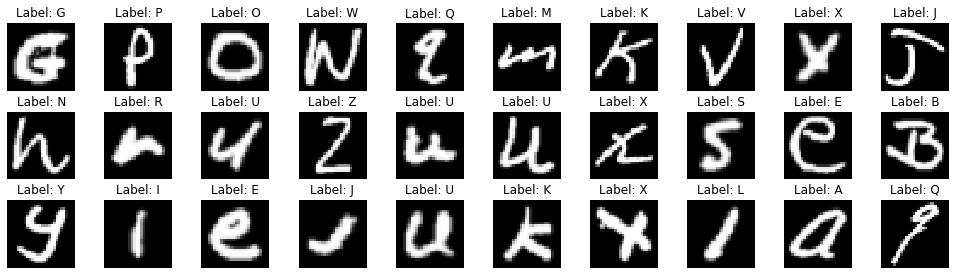

In [49]:
fig = plt.figure(figsize=(17,4.5))
for idx in range(30):
    fig.add_subplot(3,10,idx+1)
    plt.axis('off')
    show_img(np.squeeze(x[idx]),y[idx])
plt.subplots_adjust(wspace=0.3, hspace=0.3)

In [50]:
test_data = np.loadtxt(test_file, skiprows=1, delimiter=',')
test_x, test_y = prep_data(test_data)

14799


In [51]:
print(test_x.shape)
print(test_y.shape)

(14799, 28, 28, 1)
(14799, 37)


In [68]:
# batch_size = 128
# epochs=1
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3), strides=1,activation='relu',input_shape = (28, 28, 1)))
# model.add(Conv2D(32, (3, 3), activation='relu', strides=1))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))
# model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

batch_size = 64
epochs = 1
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), strides=1,activation='relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', strides=1))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [69]:
basic_history = model.fit(x, y,
          batch_size = batch_size,
          epochs = 10,
          validation_split=0.2)

Train on 71039 samples, validate on 17760 samples
Epoch 1/10
71039/71039 [==============================] - 113s 2ms/sample - loss: 0.6465 - accuracy: 0.8121 - val_loss: 0.3617 - val_accuracy: 0.8919
Epoch 2/10
71039/71039 [==============================] - 113s 2ms/sample - loss: 0.3217 - accuracy: 0.8943 - val_loss: 0.3245 - val_accuracy: 0.9034
Epoch 3/10
71039/71039 [==============================] - 111s 2ms/sample - loss: 0.2624 - accuracy: 0.9116 - val_loss: 0.3307 - val_accuracy: 0.9000
Epoch 4/10
71039/71039 [==============================] - 113s 2ms/sample - loss: 0.2210 - accuracy: 0.9225 - val_loss: 0.2932 - val_accuracy: 0.9122
Epoch 5/10
71039/71039 [==============================] - 112s 2ms/sample - loss: 0.1929 - accuracy: 0.9314 - val_loss: 0.2701 - val_accuracy: 0.9203
Epoch 6/10
71039/71039 [==============================] - 113s 2ms/sample - loss: 0.1762 - accuracy: 0.9360 - val_loss: 0.2751 - val_accuracy: 0.9203
Epoch 7/10
71039/71039 [==========================

In [75]:
eval_model(model,test_x,test_y)

14799/14799 [==============================] - 3s 191us/sample - loss: 0.2992 - accuracy: 0.9172
The accuracy of the model is:  0.9172241


[0.29924353838050116, 0.9172241]

In [76]:
model.save('Emnist.h5')
print("Model saved")

Model saved


In [77]:
#  plot_history(basic_history)

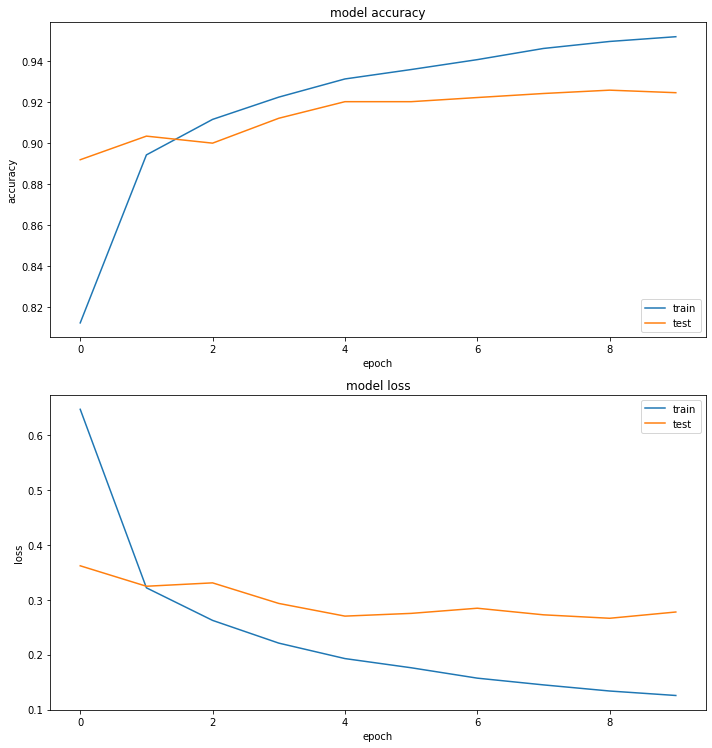

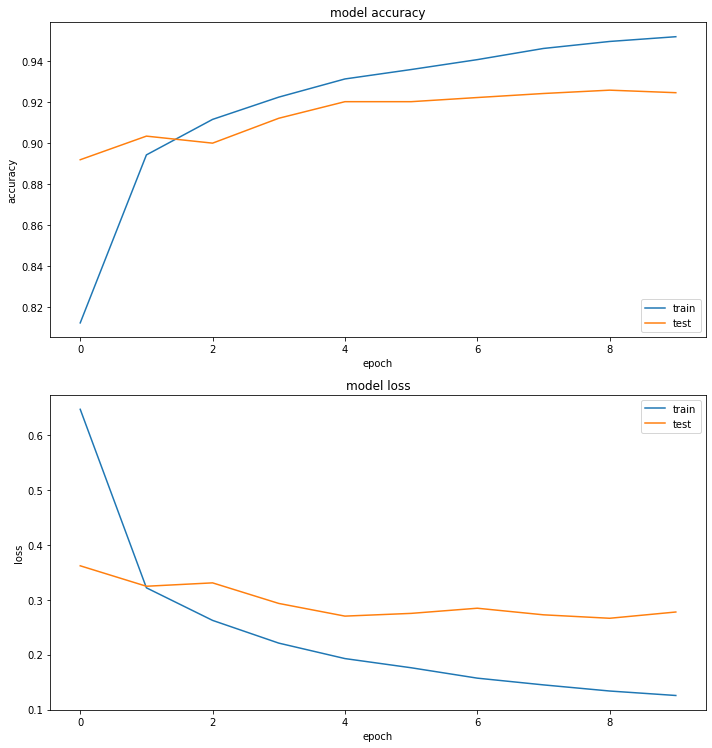

In [78]:
fig = plt.figure(figsize=(10,10.5))
# fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(basic_history.history['accuracy'])
plt.plot(basic_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(basic_history.history['loss'])
plt.plot(basic_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [79]:
import tensorflow as tf 
mnist_model = tf.keras.models.load_model('Emnist.h5')

In [80]:
test_x[0].shape

(28, 28, 1)

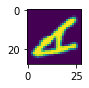

In [81]:
plt.rcParams['figure.figsize'] = (1,1)
plt.imshow(test_x[0][:,:,0])
plt.show()

In [82]:
preds = mnist_model.predict_classes(test_x)

In [83]:
preds.shape

(14799,)

In [84]:
test_y.shape

(14799, 37)

In [85]:
actuals = np.argmax(test_y,axis=1)
correct_indices = np.nonzero(preds == actuals)[0]

In [86]:
incorrect_indices = np.nonzero(preds != actuals)[0]

In [87]:
print(len(correct_indices)," classified correctly out of ",len(actuals))
# print(len(correct_indices)," classified correctly")

13574  classified correctly out of  14799


In [88]:
print(len(incorrect_indices)," classified incorrectly out of ",len(actuals))
# print(len(incorrect_indices)," classified incorrectly")

1225  classified incorrectly out of  14799


In [89]:
preds[incorrect_indices]

array([21, 26, 17, ...,  7,  7,  8], dtype=int64)

In [90]:
# def decode_label(binary_encoded_label):
#     return np.argmax(binary_encoded_label)-1

In [91]:
# def show_img(img,label):
#     img = test_x[correct].reshape(28,28)
#     img_flip = np.transpose(img, axes=[1,0])
#     plt.title('Label: ' + str(preds[decode_label(label)]))
#     plt.imshow(img_flip, cmap='Greys_r')

Incorrect data values


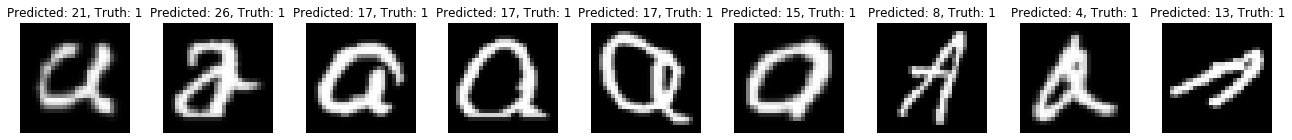

In [92]:
print("Incorrect data values")
fig = plt.figure(figsize=(25,10.5))
for i, incorrect in enumerate(incorrect_indices[:9]):
    fig.add_subplot(3,10,i+1)
    plt.axis('off')
    img = test_x[incorrect].reshape(28,28)
    img_flip = np.transpose(img, axes=[1,0])
    plt.imshow(img_flip, cmap='gray', interpolation='none')
    plt.title("Predicted: {}, Truth: {}".format(preds[incorrect],actuals[incorrect]))
    plt.xticks([])
    plt.yticks([])

#     show_img(np.squeeze(x[correct]),y[correct])
plt.subplots_adjust(wspace=0.3, hspace=0.3)

Correct data values


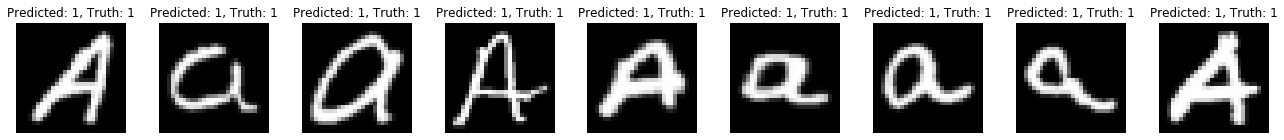

In [93]:
print("Correct data values")
fig = plt.figure(figsize=(25,10.5))
for i, correct in enumerate(correct_indices[:9]):
    fig.add_subplot(3,10,i+1)
    plt.axis('off')
    img = test_x[correct].reshape(28,28)
    img_flip = np.transpose(img, axes=[1,0])
    plt.imshow(img_flip, cmap='gray', interpolation='none')
    plt.title("Predicted: {}, Truth: {}".format(preds[correct],actuals[correct]))
    plt.xticks([])
    plt.yticks([])

#     show_img(np.squeeze(x[correct]),y[correct])
plt.subplots_adjust(wspace=0.3, hspace=0.3)

In [36]:
# # adapt figure size to accomodate 18 subplots
# plt.rcParams['figure.figsize'] = (25,144.5)

# figure_evaluation = plt.figure()

# # plot 9 correct predictions
# for i, correct in enumerate(correct_indices[:9]):
#     plt.subplot(3,10,i+1)
#     img_flip = np.transpose(test_x[correct].reshape(28,28), axes=[1,0])
#     plt.imshow(img_flip, cmap='gray', interpolation='none')
#     plt.title("Predicted: {}, Truth: {}".format(preds[correct],actuals[correct]))
#     plt.xticks([])
#     plt.yticks([])

# # plot 9 incorrect predictions
# for i, incorrect in enumerate(incorrect_indices[:9]):
#     plt.subplot(3,10,i+1)
#     img_flip = np.transpose(test_x[incorrect].reshape(28,28), axes=[1,0])
#     plt.imshow(img_flip, cmap='gray', interpolation='none')
#     plt.title("Predicted {}, Truth: {}".format(preds[incorrect], 
#                                        actuals[incorrect]))
#     plt.xticks([])
#     plt.yticks([])

# figure_evaluation

In [37]:
# # predicted_classes = mnist_model.predict_classes(test_x)

# # # see which we predicted correctly and which not
# # correct_indices = np.nonzero(predicted_classes == test_y)[0]
# # incorrect_indices = np.nonzero(predicted_classes != test_y)[0]
# # print()
# # print(len(correct_indices)," classified correctly")
# # print(len(incorrect_indices)," classified incorrectly")

# # adapt figure size to accomodate 18 subplots
# plt.rcParams['figure.figsize'] = (17,14.5)

# figure_evaluation = plt.figure()

# # plot 9 correct predictions
# for i, correct in enumerate(correct_indices[:9]):
#     plt.subplot(3,10,i+1)
#     plt.imshow(test_x[correct].reshape(28,28), cmap='gray', interpolation='none')
#     plt.title(
#       "Predicted: {}, Truth: {}".format(predicted_classes[correct],
#                                         test_y[correct]))
#     plt.xticks([])
#     plt.yticks([])

# # plot 9 incorrect predictions
# for i, incorrect in enumerate(incorrect_indices[:9]):
#     plt.subplot(3,10,i+1)
#     plt.imshow(test_x[incorrect].reshape(28,28), cmap='gray', interpolation='none')
# #     plt.title(
# #       "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
# #                                        test_y[incorrect]))
#     plt.xticks([])
#     plt.yticks([])

# figure_evaluation